In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata,study_results,how="left",on="Mouse ID")


# Display the data table for preview
combined_data.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
mouse_count = len(pd.unique(combined_data["Mouse ID"]))
mouse_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


#^^^
#We are using the .loc method to slice the dataframe based on a condition:

#Where Mouse ID and Timepoint are duplicated.

#And we are grabbing the unique values from the Mouse ID column

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouseID = combined_data.loc[(combined_data['Mouse ID'] == 'g989'), :]
duplicates_mouseID.tail(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop(combined_data[combined_data['Mouse ID'] == 'g989'].index, inplace = True)

In [7]:
#combined_data[combined_data.eq('g989').any(1)]
  # ^^ verifying that g989 has been removed 


In [8]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(pd.unique(combined_data["Mouse ID"]))
mouse_count

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor_vol = combined_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_vol = combined_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_tumor_vol = combined_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
stdev_tumor_vol = combined_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stderr_tumor_vol = combined_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_vol,
    "Median Tumor Volume":median_tumor_vol,
    "Tumor Volume Variance":variance_tumor_vol,
    "Tumor Volume Std. Dev.":stdev_tumor_vol,
    "Tumor Volume Std. Err.":stderr_tumor_vol
    
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
#!! This step unfinished.. 

adv_method = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

adv_DF = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
adv_DF.head()

#use group by function -> then .agg

#missing "Tumor Volume (mm3)" header... 




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

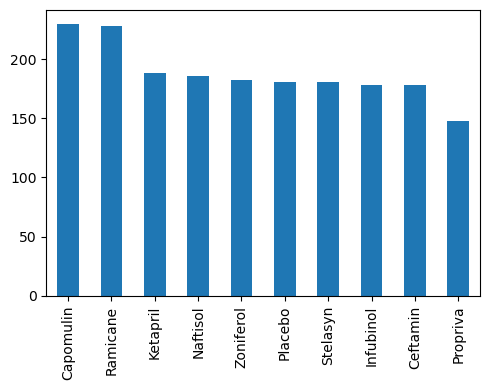

In [78]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# use value counts of diff drug regimen from overall merged DF -> use that to make series and call them in the counts.plot 

#drug_names = pd.unique(combined_data["Drug Regimen"])
#drug_names

#mouse_count = len(pd.unique(combined_data["Mouse ID"]))
#drug_tumor_vol = combined_data[["Tumor Volume (mm3)","Drug Regimen"]]
#drug_tumor_vol
#counts.plot

counts = combined_data['Drug Regimen'].value_counts()
counts
counts.plot(kind='bar',figsize=(5,4))
plt.title
plt.tight_layout()
plt.show()


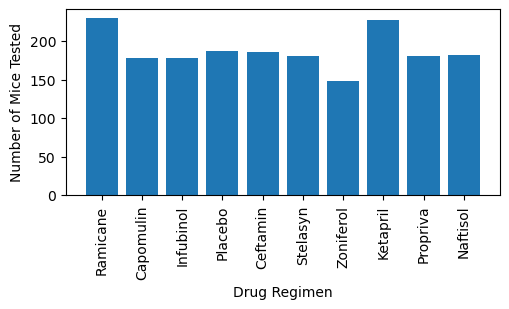

In [60]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


x_axis = (combined_data["Drug Regimen"].unique())
tick_location = [x for x in x_axis]
plt.figure(figsize=(5,3))



count_regimen_types = combined_data.groupby('Drug Regimen')
count_regimens = count_regimen_types['Drug Regimen'].count()

plt.bar(x_axis,count_regimens,align='center')

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()
